# Hypoxic Time Transitions

This notebook contains code on generating the W to H and Y to H transitions.

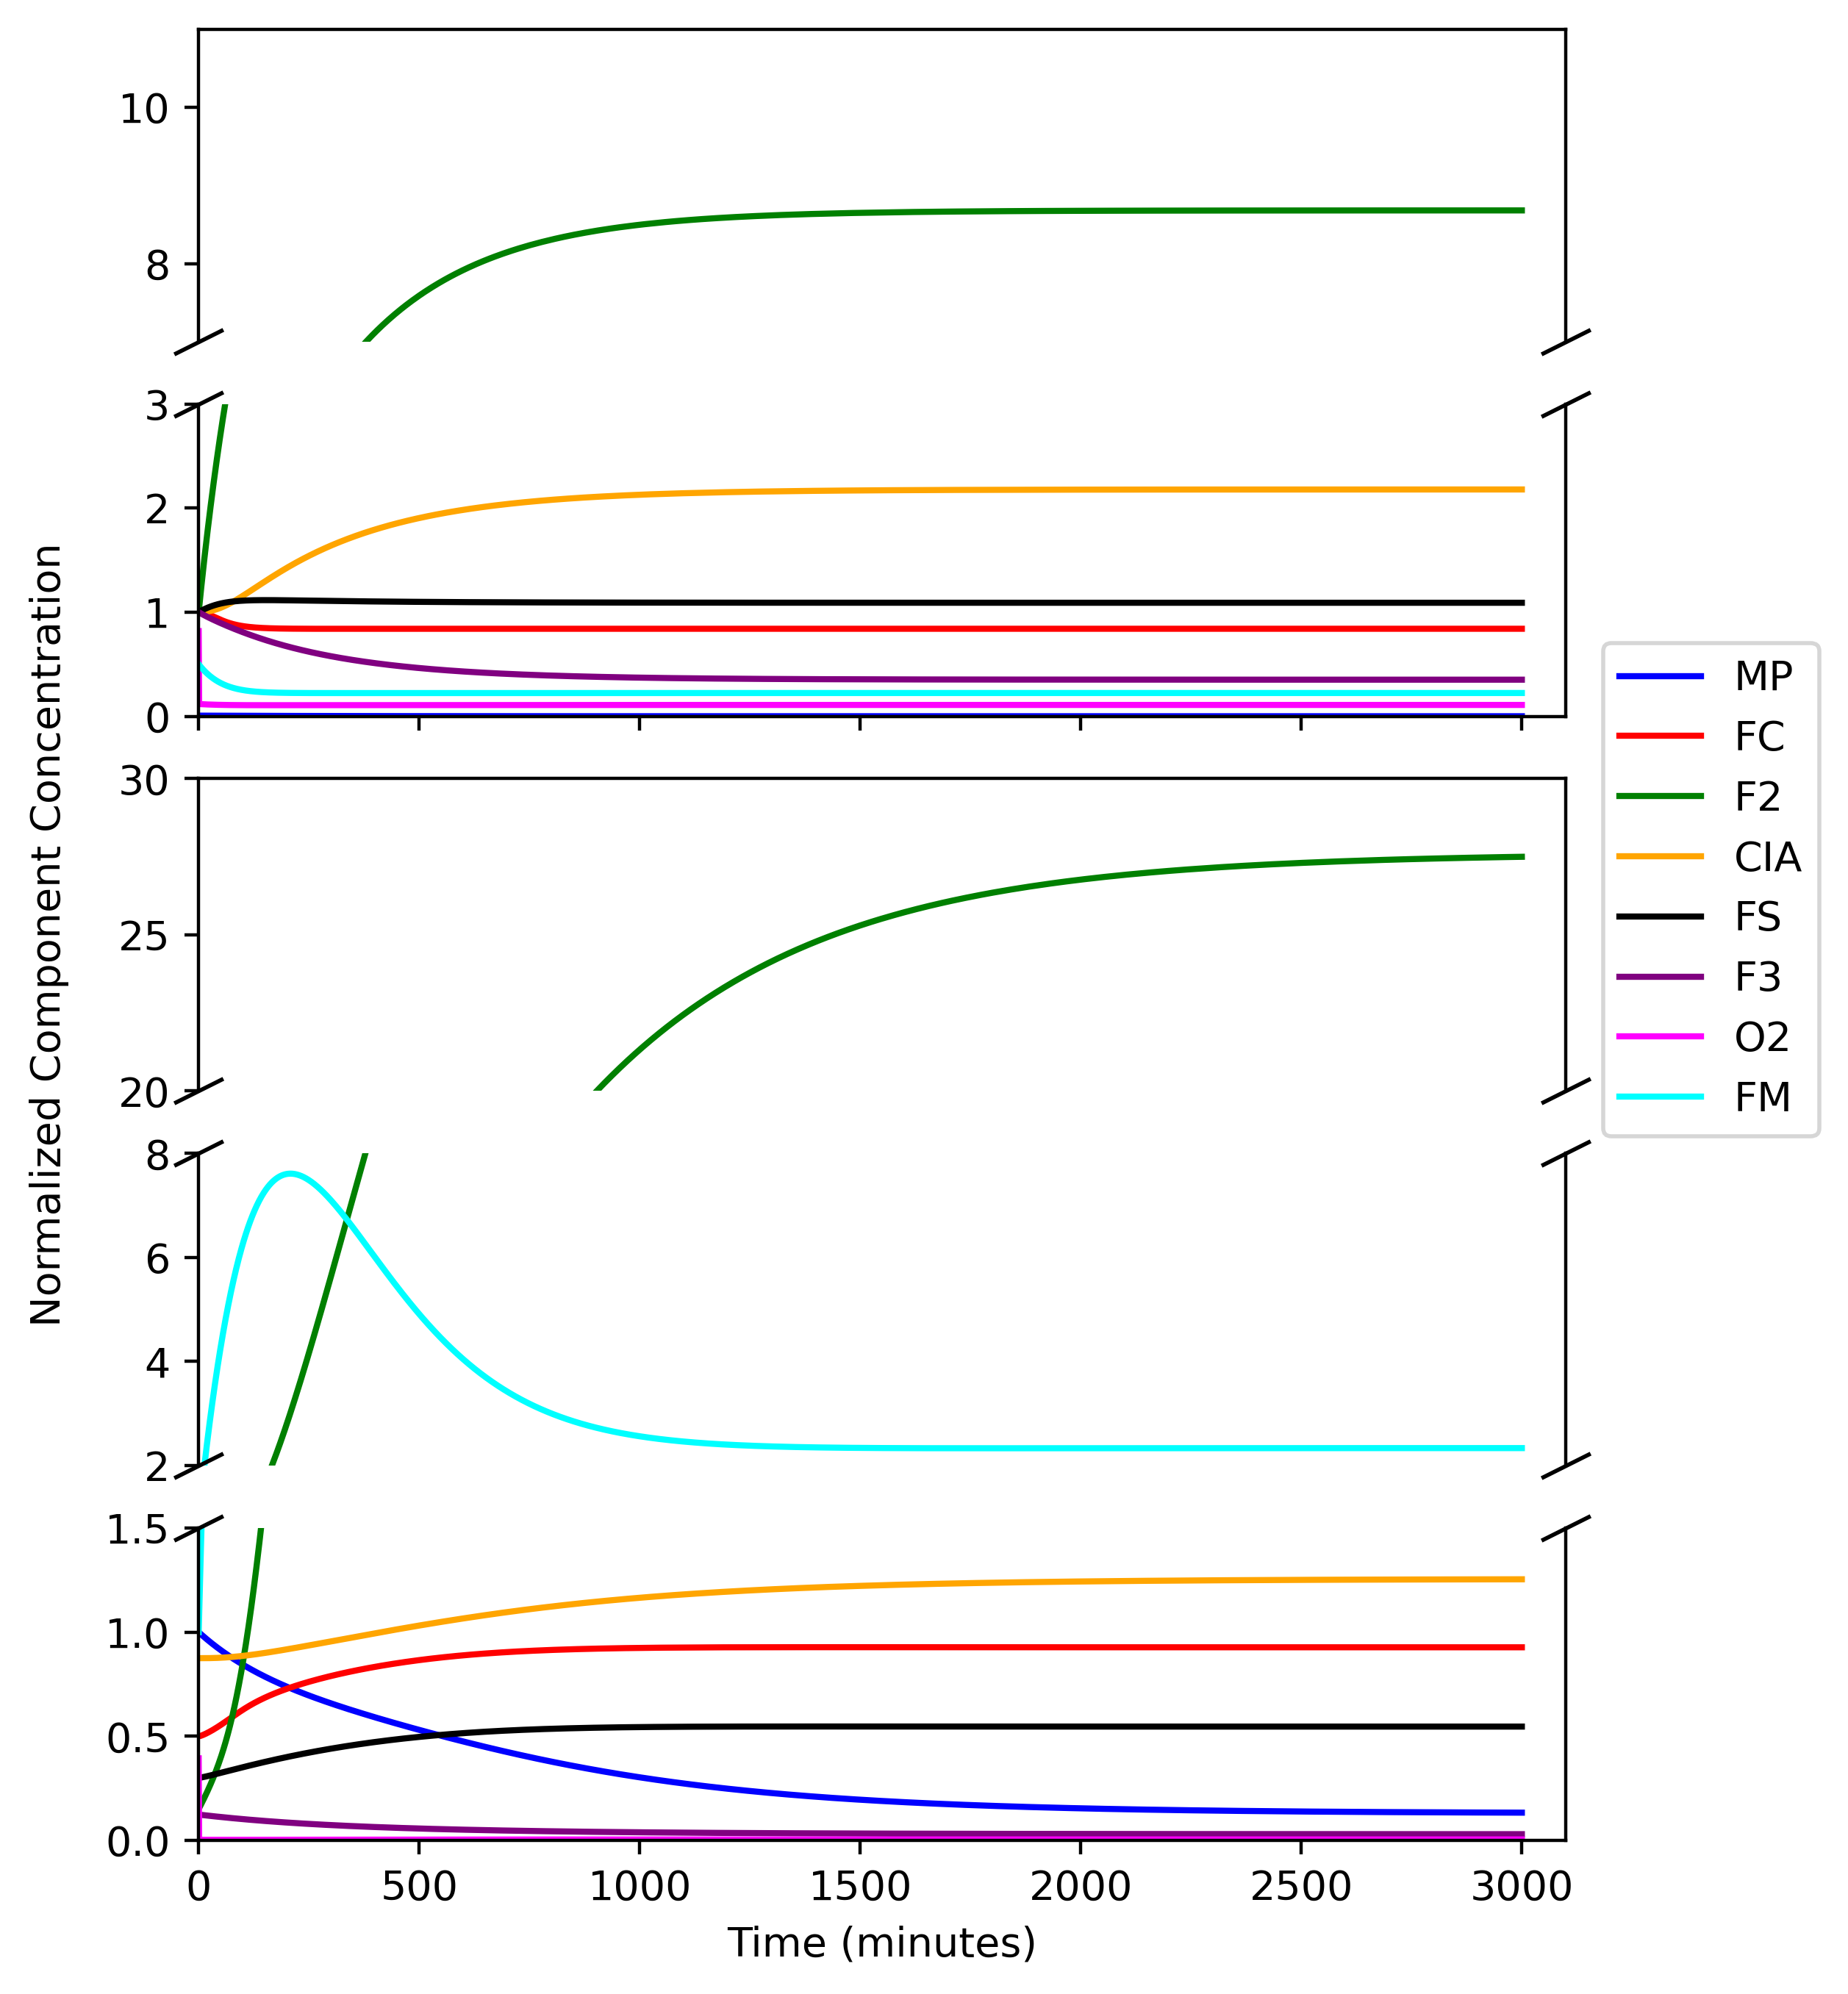

<Figure size 2560x1920 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400

yhtime = pd.read_csv("data/yhtime.csv")
whtime = pd.read_csv("data/whtime.csv")
vals = yhtime.columns.values[1:]
comps = dict()
comps["FC"] = {20, 10, 5};
comps["CIA"] = {80, 70, 68};
comps["F2"] = {200, 30, 20};
comps["F3"] = {3400, 420, 60};
comps["FM"] = {100, 200, 50};
comps["FS"] = {500, 150, 300};
comps["MP"] = {50, 8500, 20};
comps["O2"] = {1.0, 0.481333, 1.22222};
COMPONENTS = ["MP","FC","F2","CIA","F3","FS","FM","O2"]
COLORS = ["b","r","g","orange","purple","black","cyan","magenta"]
color_map = dict()
for i in range(len(COMPONENTS)):
    color_map[COMPONENTS[i]] = COLORS[i]
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(5, 1)
fig.subplots_adjust(hspace=0.2) 
ax5.sharex(ax3)
ax3.sharex(ax4)
ax2.sharex(ax5)
ax1.sharex(ax2)
ax3.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax3.tick_params(bottom=False)
ax4.tick_params(bottom=False)
ax5.xaxis.tick_bottom()
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.tick_params(bottom=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
for v in vals:
    ax3.plot(yhtime["time"].values, yhtime[v].values/max(comps[v]),color_map[v],label=v)
    ax4.plot(yhtime["time"].values, yhtime[v].values/max(comps[v]),color_map[v],label=v)
    ax5.plot(yhtime["time"].values, yhtime[v].values/max(comps[v]),color_map[v],label=v)
    ax1.plot(whtime["time"].values, whtime[v].values/max(comps[v]),color_map[v],label=v)
    ax2.plot(whtime["time"].values, whtime[v].values/max(comps[v]),color_map[v],label=v)
ax1.set_ylim(7,11)
ax2.set_ylim(0,3)
ax3.set_ylim(20,30)
ax4.set_ylim(2,8)
ax5.set_ylim(0,1.5)

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)

ax3.plot([0, 1], [0, 0], transform=ax3.transAxes, **kwargs)
ax4.plot([0, 1], [0,0], [1,0], [1,1], transform=ax4.transAxes, **kwargs)
ax5.plot([0, 1], [1, 1], transform=ax5.transAxes, **kwargs)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot( [1,0], [1,1], transform=ax2.transAxes, **kwargs)
ax3.legend(bbox_to_anchor=(1.2, 1.5))
ax5.set_xlim(0,3100)

plt.xlabel("Time (minutes)")
ax3.set_ylabel("Normalized Component Concentration",labelpad=12)
plt.gcf().set_size_inches(6, 8)
plt.show()
